#  <center> Prueba Tecnica Conhintec</center>
## <center> Main: Breast Cancer Solution</center> 
### <center>Autor:<center>
#### <center>Sebastian Carvalho Salazar<center>


Modelando...
(569, 7)
(569, 1)
0.943828598043782
RandomForestClassifier(max_depth=3, max_leaf_nodes=5, n_estimators=200,
                       n_jobs=-1)
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       125
           1       0.93      0.93      0.93        75

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



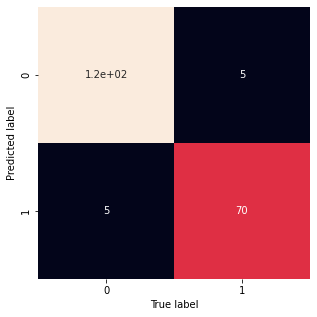

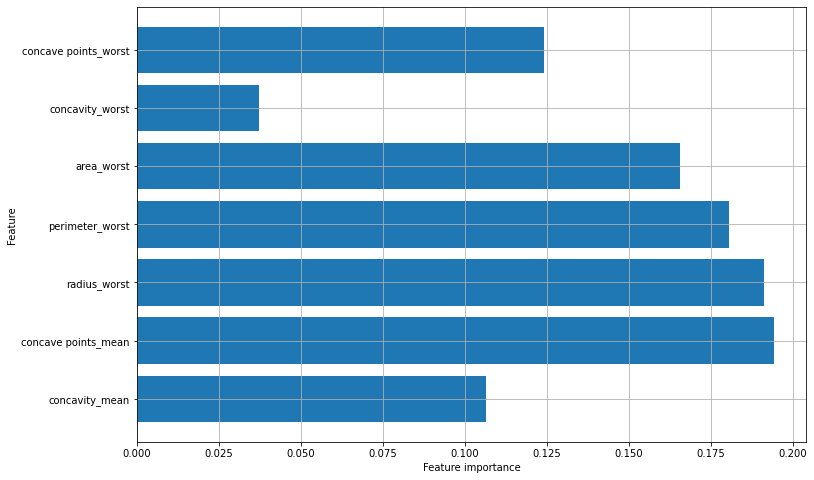

feature_importance_name: Index(['concavity_worst'], dtype='object')


In [32]:
%run utils.ipynb
%run models.ipynb

utils = Utils()
models = Models()

data = utils.load_from_csv('../in/df_filtered_pca_reduced.csv')
print("Modelando...")
print("="*100)

X, y = utils.features_target(data, ['diagnosis','texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean',
       'radius_se', 'perimeter_se', 'area_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'pca_radius_perimeter_area'] , ['diagnosis'])

print(X.shape)
print(y.shape)

grid_reg = models.grid_training(X, y)

models.model_results(X, y, grid_reg)

#  <center>Análisis de Resultados</center>

### ¿Por qué Arboles de Decisión? 

Los árboles de desición tienen dos ventajas respecto a los demás algoritmos. El modelo resultante puede ser comprendido y visualizado fácilmente y los algoritmos son independientes de la escala de los datos.

Por otro lado, la principal falencia es que los árboles de decisión suelen tender a sobreajustar los datos, incluso cuando se aplica el  pre-podado. Para evitarlo, es posible utilizar métodos de conjunto (ensemble methods). Los método de ensamble son aquellos en los cuales se unen diferentes tipos de algorítmos o el mísmo algorítmo multiples veces con el fin de crear un predictor más robusto.

El método de bosques aleatorios  es un ensamble de árboles de desición en el cual el entrenamiento se realiza mediante bootstraping y la desición final se toma con la moda (para clasificación) o la media (para regresión) de las predicciones de cada árbol.

Puede tenerse la importancia relativa de las carácterísticas, lo cual nos permite hacer selección de las mísmas para hacer reducción dimensional. Finalmente, una de sus desventajas es queal ser un método de ensamble puede ser muy costoso computacionalmente, tanto para entrenamiento como para predicción.

### ¿Cuál y porque de la métrica de rendimiento a utilizar?

###### Si la prueba es negativa (1), se supondrá que el paciente está sano, mientras que si la prueba es positiva (0)

El problema aquí es que la accuracy es una medida inadecuada para cuantificar el rendimiento predictivo en un escenario no balanceado, el cual es el escenario mas comun, Por lo que necesitamos métricas alternativas.

La precisión mide cuántas de las muestras predichas como positivas son realmente positivas. Se utiliza como una métrica de rendimiento cuando el objetivo es limitar el número de falsos positivos.

$$\text{Precisión} = \frac{TP}{TP + FP}$$

La **exhaustividad**, por otro lado, mide cuántas de las muestras positivas son capturadas por las predicciones positivas. Se utiliza como métrica de rendimiento cuando necesitamos identificar todas las muestras positivas; es decir, cuando es importante evitar falsos negativos.

$$\text{Exhaustividad} = \frac{TP}{TP + FN}$$


El **puntaje f** es la media armónica entre precisión y exhaustividad.

$$f = 2  \frac{\text{Precisión}*\text{Exhaustividad}}{\text{Precisión}+\text{Exhaustividad}}$$


El **accuracy** mide que tan bien realiza la predicción correcta un clasificador. Este valor corresponde a la razón entre el número de predicciones correctas respecto al número total de predicciones:

\begin{equation}
\text{Accuracy} = \frac{TP+TN}{TP+FP+TN+FN}
\end{equation}